# Airbnb Analysis: Seattle & Boston

### This analysis will answer the following questions?
1. What are the most expensive and least expensive time to travel to Seattle and Boston?
2. What are the top 5 most expesive neighbourhoods to rent Airbnb's for each city? How does this differ from the top 5 least expensive neighbourhoods?
3. What property types are the most and least expensive to rent for each city? 
4. How well can you predict the price based off of the city, year, month, neighbourhood, and price?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime
import calendar
%matplotlib inline

Reading the Airbnb data files

In [3]:
df_sl = pd.read_csv('./seattle_listings.csv')
df_sl.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df_sl.shape

(3818, 92)

In [5]:
df_sc = pd.read_csv('./seattle_calendar.csv')
df_sc.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
df_sc.shape

(1393570, 4)

In [7]:
df_bl = pd.read_csv('./boston_listings.csv')
df_bl.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
df_bl.shape

(3585, 95)

In [9]:
df_bc = pd.read_csv('./boston_calendar.csv')
df_bc.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [10]:
df_bc.shape

(1308890, 4)

Combine the Seattle and Boston calendar data into one dataframe

In [11]:
df_all_calendar = pd.concat([df_sc, df_bc])
df_all_calendar.shape

(2702460, 4)

Add in the city the pertains to each listing dataset as a column. This will allow for us to differentiate between cities after the listings data is combined

Select the columns that analysis is going to persist of

In [12]:
df_sl['city'] = 'Seattle'
df_bl['city'] = 'Boston'

df_sl = df_sl[['id', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
              'state', 'city', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
              'amenities', 'square_feet', 'price', 'review_scores_value']]

df_bl = df_bl[['id', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
              'state', 'city', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
              'amenities', 'square_feet', 'price', 'review_scores_value']]


Combine the Seattle and Boston listings data into one dataframe

In [13]:
df_all_listings = pd.concat([df_sl, df_bl])
df_all_listings.shape

(7403, 15)

Join the listings data to the calendar data on the id and listing id

In [23]:
df_master = pd.merge(df_all_listings, df_all_calendar, left_on = 'id', right_on = 'listing_id', how = 'inner')

In [24]:
df_master.head()

,id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,state,city,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,square_feet,price_x,review_scores_value,listing_id,date,available,price_y
0,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,10.0,241032,2016-01-04,t,$85.00
1,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,10.0,241032,2016-01-05,t,$85.00
2,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,10.0,241032,2016-01-06,f,NaN
3,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,10.0,241032,2016-01-07,f,NaN
4,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,10.0,241032,2016-01-08,f,NaN


In [25]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 19 columns):
id                              int64
host_is_superhost               object
neighbourhood_cleansed          object
neighbourhood_group_cleansed    object
state                           object
city                            object
property_type                   object
room_type                       object
accommodates                    int64
bathrooms                       float64
bedrooms                        float64
amenities                       object
square_feet                     float64
price_x                         object
review_scores_value             float64
listing_id                      int64
date                            object
available                       object
price_y                         object
dtypes: float64(4), int64(3), object(12)
memory usage: 412.4+ MB


In [26]:
df_master.isnull().sum(axis=0)

id                                    0
host_is_superhost                   730
neighbourhood_cleansed                0
neighbourhood_group_cleansed    1308890
state                                 0
city                                  0
property_type                      1460
room_type                             0
accommodates                          0
bathrooms                         10950
bedrooms                           5840
amenities                             0
square_feet                     2646615
price_x                               0
review_scores_value              539470
listing_id                            0
date                                  0
available                             0
price_y                         1124881
dtype: int64

Create a column called price, which equals price_x, and then drop the columns price_x and price_y

In [27]:
df_master['price'] = df_master['price_x']

In [28]:
df_master = df_master.drop(columns = ['price_x', 'price_y'])

Convert the date column to a datetime data type using pandas

In [29]:
df_master['date'] =  pd.to_datetime(df_master['date'], format='%Y/%m/%d')


Extract the month name, month number, and the year from the date column. These new columns will be used in the anaylsis

In [30]:
df_master['month_name'] = df_master['date'].dt.month_name()

In [31]:
df_master['month'] = df_master['date'].dt.month

In [32]:
df_master['year'] = df_master['date'].dt.year

Remove the dollar sign from the price column, and then convert the column into a float

In [33]:
df_master['price'] = df_master['price'].replace({'\$': '', ',': ''}, regex = True).astype(float)

In [50]:
df_master.head(15)

,id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,state,city,property_type,room_type,accommodates,bathrooms,...,amenities,square_feet,review_scores_value,listing_id,date,available,price,month_name,month,year
0,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-04,t,85.0,January,1,2016
1,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-05,t,85.0,January,1,2016
2,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-06,f,85.0,January,1,2016
3,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-07,f,85.0,January,1,2016
4,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-08,f,85.0,January,1,2016
5,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-09,f,85.0,January,1,2016
6,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-10,f,85.0,January,1,2016
7,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-11,f,85.0,January,1,2016
8,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-12,f,85.0,January,1,2016
9,241032,f,West Queen Anne,Queen Anne,WA,Seattle,Apartment,Entire home/apt,4,1.0,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10.0,241032,2016-01-13,t,85.0,January,1,2016


In [51]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 21 columns):
id                              int64
host_is_superhost               object
neighbourhood_cleansed          object
neighbourhood_group_cleansed    object
state                           object
city                            object
property_type                   object
room_type                       object
accommodates                    int64
bathrooms                       float64
bedrooms                        float64
amenities                       object
square_feet                     float64
review_scores_value             float64
listing_id                      int64
date                            datetime64[ns]
available                       object
price                           float64
month_name                      object
month                           int64
year                            int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(10)


In [52]:
df_master.isnull().sum(axis=0)

id                                    0
host_is_superhost                   730
neighbourhood_cleansed                0
neighbourhood_group_cleansed    1308890
state                                 0
city                                  0
property_type                      1460
room_type                             0
accommodates                          0
bathrooms                         10950
bedrooms                           5840
amenities                             0
square_feet                     2646615
review_scores_value              539470
listing_id                            0
date                                  0
available                             0
price                                 0
month_name                            0
month                                 0
year                                  0
dtype: int64

### Question: 1 
#### What are the most expensive and least expensive time to travel to Seattle and Boston?

To answer this question we will need to take the mean price by the city, year, and month. Before we calculate the mean, the dataset needs to filter where the available column has a value of f. The reason for this is we want to look at prices that consumers are willing to pay for.

In [60]:
df_1 = df_master[['month', 'price', 'city', 'year', 'available']]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 5 columns):
month        int64
price        float64
city         object
year         int64
available    object
dtypes: float64(1), int64(2), object(2)
memory usage: 123.7+ MB


In [61]:
df_1 = df_1.loc[df_1['available'] == 'f']

In [62]:
df_1 = df_1.groupby(['city', 'year', 'month']).mean().reset_index()
df_1

,city,year,month,price
0,Boston,2016,9,164.124017
1,Boston,2016,10,164.588914
2,Boston,2016,11,164.828986
3,Boston,2016,12,163.657358
4,Boston,2017,1,166.968011
5,Boston,2017,2,170.304441
6,Boston,2017,3,173.289953
7,Boston,2017,4,173.774565
8,Boston,2017,5,174.538721
9,Boston,2017,6,174.105289


Split the dataset into two seperate datasets by city. The reason for this is that the Seattle and Boston data have different year and month combinations

In [63]:
df_1_seattle = df_1.loc[df_1['city'] == 'Seattle'].reset_index().drop('index', axis = 1)
df_1_seattle

,city,year,month,price
0,Seattle,2016,1,130.865897
1,Seattle,2016,2,134.053742
2,Seattle,2016,3,137.092069
3,Seattle,2016,4,130.429161
4,Seattle,2016,5,130.548910
5,Seattle,2016,6,131.208038
6,Seattle,2016,7,127.247009
7,Seattle,2016,8,127.172859
8,Seattle,2016,9,126.426503
9,Seattle,2016,10,126.246993


The most expensive time to travel to Seattle is March with an average price of $137. The price for Airbnb's seems to be decreasing from 2016 to 2017, however this only looking at the January year over year comparison

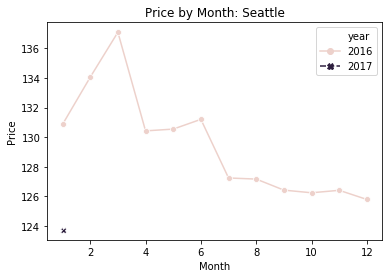

In [64]:
sns.lineplot(x = 'month', y = 'price', hue = 'year', ci = None, style = 'year', markers = True, data = df_1_seattle)
plt.title('Price by Month: Seattle')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show();

Perform the same steps completed on the Seattle dataset to the Boston dataset

In [65]:
df_1_boston = df_1.loc[df_1['city'] == 'Boston'].reset_index().drop('index', axis = 1)
df_1_boston

,city,year,month,price
0,Boston,2016,9,164.124017
1,Boston,2016,10,164.588914
2,Boston,2016,11,164.828986
3,Boston,2016,12,163.657358
4,Boston,2017,1,166.968011
5,Boston,2017,2,170.304441
6,Boston,2017,3,173.289953
7,Boston,2017,4,173.774565
8,Boston,2017,5,174.538721
9,Boston,2017,6,174.105289


The most expensive time to travel to Boston is September with an average price of $175. The prices for Boston are increasing year over the year. The prices will be the highest in November if 2017 prices follow the same trend as 2016 prices.

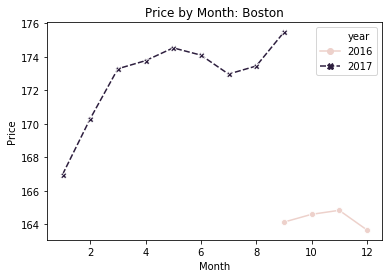

In [67]:
sns.lineplot(x = 'month', y = 'price', hue = 'year', ci = None, style = 'year', markers = True, data = df_1_boston,)
plt.title('Price by Month: Boston')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show();

### Question: 2
#### What are the top 5 most expesive neighbourhoods to rent Airbnb's for each city? How does this differ from the top 5 least expensive neighbourhoods?

To answer this question we will need to take the mean price by the neighbourhood_cleansed and city column. Before we calculate the mean, the dataset needs to filter where the available column has a value of f. The reason for this is we want to look at prices that consumers are willing to pay for.

In [68]:
df_2 = df_master[['id', 'price', 'available', 'city', 'year', 'neighbourhood_cleansed']]
df_2 = df_2.loc[df_2['available'] == 'f']

In [69]:
df_2['available'].value_counts()

f    1124881
Name: available, dtype: int64

In [70]:
df_2 = df_2[['neighbourhood_cleansed', 'city', 'price']]
df_2 = df_2.groupby(['neighbourhood_cleansed', 'city']).mean().reset_index()
df_2.head()

,neighbourhood_cleansed,city,price
0,Adams,Seattle,115.133884
1,Alki,Seattle,153.413006
2,Allston,Boston,109.589239
3,Arbor Heights,Seattle,95.655172
4,Atlantic,Seattle,104.067875


Split the dataset into two seperate datasets by city. The reason for this is that the Seattle and Boston data have different neighbourhoods

In [71]:
df_2_seattle = df_2.loc[df_2['city'] == 'Seattle']
df_2_boston = df_2.loc[df_2['city'] == 'Boston']

The mean price from the top 5 most expensive neighbourhoods had an average price of 219 dollars , while the bottom 5 least expensive neighbourhoods had an average price of 66 dollars. The large difference suggests that the neighbourhood the Airbnb is located plays a factor in the price.

In [76]:
df_2_seattle_large = df_2_seattle.nlargest(5,'price')
df_2_seattle_large

,neighbourhood_cleansed,city,price
65,Montlake,Seattle,236.731925
79,Portage Bay,Seattle,231.803817
44,Industrial District,Seattle,228.936508
96,Southeast Magnolia,Seattle,207.820896
110,Windermere,Seattle,189.237288


In [78]:
df_2_seattle_large.mean()

price    218.906087
dtype: float64

In [79]:
df_2_seattle_small = df_2_seattle.nsmallest(5,'price')
df_2_seattle_small

,neighbourhood_cleansed,city,price
80,Rainier Beach,Seattle,55.532621
12,Brighton,Seattle,58.404284
35,Georgetown,Seattle,71.912281
24,Dunlap,Seattle,71.953523
58,Maple Leaf,Seattle,74.009448


In [80]:
df_2_seattle_small.mean()

price    66.362431
dtype: float64

The mean price from the top 5 most expensive neighbourhoods had an average price of 252 dollars , while the bottom 5 least expensive neighbourhoods had an average price of 96 dollars. The large difference is consistent with Seattle and also suggests that the neighbourhood the Airbnb is located plays a factor in the price.

In [121]:
df_2_boston_large = df_2_boston.nlargest(5,'price')
df_2_boston_large

,neighbourhood_cleansed,city,price
91,South Boston Waterfront,Boston,343.648717
23,Downtown,Boston,248.391104
5,Back Bay,Boston,231.890877
19,Chinatown,Boston,225.550551
50,Leather District,Boston,211.813636


In [123]:
df_2_boston_large.mean()

price    252.258977
dtype: float64

In [122]:
df_2_boston_small = df_2_boston.nsmallest(5,'price')
df_2_boston_small

,neighbourhood_cleansed,city,price
59,Mattapan,Boston,70.141885
106,West Roxbury,Boston,101.066062
22,Dorchester,Boston,102.830106
43,Hyde Park,Boston,104.169622
11,Brighton,Boston,104.307769


In [124]:
df_2_boston_small.mean()

price    96.503089
dtype: float64

### Question: 3
#### What property types are the most and least expensive to rent for each city? 

To answer this question we will need to take the mean price by the property type and city. Before we calculate the mean, the dataset needs to filter where the available column has a value of f. The reason for this is we want to look at prices that consumers are willing to pay for.

In [89]:
df_3 = df_master[['price', 'available', 'city', 'property_type']]
df_3 = df_3.loc[df_3['available'] == 'f']

In [90]:
df_3['available'].value_counts()

f    1124881
Name: available, dtype: int64

In [91]:
df_3 = df_3.dropna(subset = ['property_type'])

In [92]:
df_3.isnull().sum(axis = 0)

price            0
available        0
city             0
property_type    0
dtype: int64

In [93]:
df_3['property_type'].value_counts()

Apartment          717212
House              278100
Condominium         64874
Townhouse           27463
Loft                13549
Bed & Breakfast      7694
Other                3034
Cabin                2583
Villa                1855
Bungalow             1438
Camper/RV            1348
Boat                 1348
Tent                  951
Dorm                  918
Entire Floor          631
Treehouse             422
Guesthouse            206
Yurt                  188
Chalet                 64
Name: property_type, dtype: int64

In [94]:
df_3 = df_3.groupby(['property_type', 'city']).mean().reset_index()

In [95]:
df_3 = df_3.round({'price': 0})

In [96]:
df_3.head()

,property_type,city,price
0,Apartment,Boston,176.0
1,Apartment,Seattle,118.0
2,Bed & Breakfast,Boston,159.0
3,Bed & Breakfast,Seattle,105.0
4,Boat,Boston,307.0


Create a price column for Seattle and another Boston. This is accomplished by seperating the datasets by city and renaming the pricing to indicate which city it belongs to. Then a full join will be performed on the property type name

In [99]:
df_3_boston = df_3.loc[df_3['city'] == 'Boston']
df_3_boston = df_3_boston.rename(columns={'price':'Boston'}).sort_values(['Boston'], ascending = False)
df_3_boston.head()

,property_type,city,Boston
4,Boat,Boston,307.0
21,Other,Boston,293.0
16,Guesthouse,Boston,289.0
27,Villa,Boston,216.0
11,Condominium,Boston,181.0


In [100]:
df_3_seattle = df_3.loc[df_3['city'] == 'Seattle']
df_3_seattle = df_3_seattle.rename(columns={'price':'Seattle'}).sort_values(['Seattle'], ascending = False)
df_3_seattle.head()

,property_type,city,Seattle
26,Treehouse,Seattle,159.0
20,Loft,Seattle,149.0
18,House,Seattle,142.0
12,Condominium,Seattle,141.0
10,Chalet,Seattle,135.0


In [101]:
df_3 = pd.merge(df_3_seattle, df_3_boston, left_on = 'property_type', right_on = 'property_type', how = 'outer')
df_3 = df_3[['property_type', 'Boston', 'Seattle']]
df_3

,property_type,Boston,Seattle
0,Treehouse,NaN,159.0
1,Loft,175.0,149.0
2,House,128.0,142.0
3,Condominium,181.0,141.0
4,Chalet,NaN,135.0
5,Townhouse,135.0,130.0
6,Apartment,176.0,118.0
7,Boat,307.0,113.0
8,Bed & Breakfast,159.0,105.0
9,Camper/RV,60.0,105.0


Fill NaN value as zeros

In [102]:
df_3[['Seattle', 'Boston']] = df_3[['Seattle', 'Boston']].fillna(0)
df_3

,property_type,Boston,Seattle
0,Treehouse,0.0,159.0
1,Loft,175.0,149.0
2,House,128.0,142.0
3,Condominium,181.0,141.0
4,Chalet,0.0,135.0
5,Townhouse,135.0,130.0
6,Apartment,176.0,118.0
7,Boat,307.0,113.0
8,Bed & Breakfast,159.0,105.0
9,Camper/RV,60.0,105.0


In [103]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 3 columns):
property_type    19 non-null object
Boston           19 non-null float64
Seattle          19 non-null float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [104]:
df_3[['Seattle', 'Boston']] = df_3[['Seattle', 'Boston']].astype(int)

Create a bar chart to display the mean price by property type and city using Matplotlib subplots. The mean price will be attached to each bar in the bar chart by using the function autolabel

In [105]:
seattle_price = df_3['Seattle']
boston_price = df_3['Boston']
property_type_object = df_3['property_type']
property_type = np.arange(len(property_type_object))

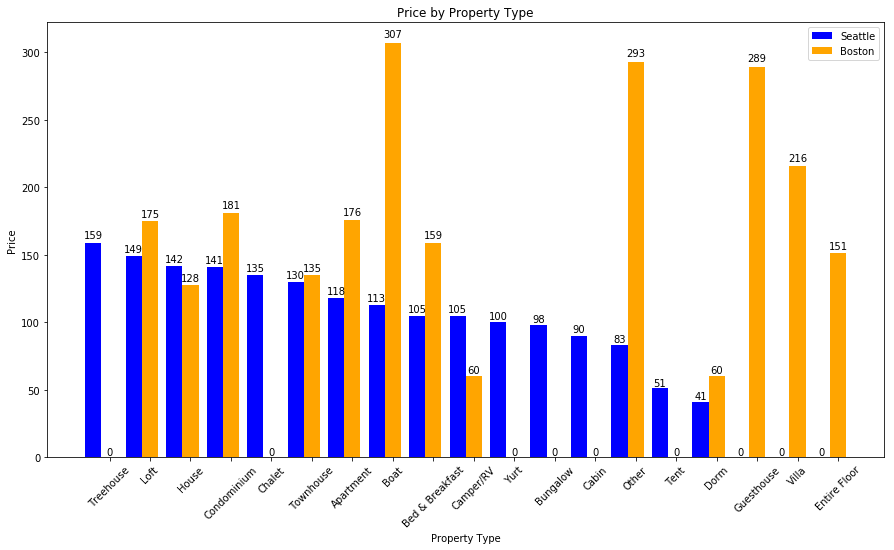

In [107]:
fig, ax = plt.subplots(figsize = (15,8))
bar_width = .4

seattle = ax.bar(property_type - bar_width/2, seattle_price, bar_width, align = 'edge', label = 'Seattle', color = 'blue')
boston = ax.bar(property_type + bar_width/2, boston_price, bar_width, align = 'edge', label = 'Boston', color = 'orange')



plt.xticks(property_type + bar_width, property_type_object, rotation = 45 )
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price by Property Type')
plt.legend()


def autolabel(rects, xpos='center'):
    '''
    INPUT:
    rects = The bar chart values
    xpos = The position of the labels on the bars
    
    OUTPUT: A label of the mean price of each neighbourhood by city attached to each bar
    '''

    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.5, 'left': 0.5}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(seattle, 'center')
autolabel(boston, 'center')

plt.show();

The highest average price by property in Seattle was the Treehouse (average price of 159 dollars), while the highest average price in Boston a boat (average price of 307 dollars). The dorms had the lowest average price at 51 dollars for Seattle while a camper/rv and dorm had the lowest average price at 60 dollars.

### Question: 4
#### How well can you predict the price based off of the city, year, month, neighbourhood, and price?

To answer this question we will need the columns mentioned in the question, along with the available column. The dataset needs to filter where the available column has a value of f. The reason for this is we want to look at prices that consumers are willing to pay for.

In [108]:
df_4 = df_master[['price', 'available', 'city', 'year', 'month_name', 'property_type', 'neighbourhood_cleansed']]
df_4 = df_4.loc[df_4['available'] == 'f']
df_4 = df_4[['price', 'city', 'year', 'month_name', 'property_type', 'neighbourhood_cleansed']]
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124881 entries, 2 to 2702459
Data columns (total 6 columns):
price                     1124881 non-null float64
city                      1124881 non-null object
year                      1124881 non-null int64
month_name                1124881 non-null object
property_type             1123878 non-null object
neighbourhood_cleansed    1124881 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 60.1+ MB


In [109]:
df_4.isnull().sum()

price                        0
city                         0
year                         0
month_name                   0
property_type             1003
neighbourhood_cleansed       0
dtype: int64

Create a function to dummy categorical data types so they can be used in the linear regression model that will follow.

In [111]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col], prefix = col, prefix_sep = '_', dummy_na = dummy_na)], axis = 1)
        except:
            continue
    return df

Create a list a list of the categorical columns and then create dummy variable for them

In [112]:
df_4_cat = df_4.select_dtypes(include=['object'])
df_4_cat_copy = df_4_cat.copy()
cat_cols_lst_4 = df_4_cat_copy.columns

df_4_clean = create_dummy_df(df_4, cat_cols_lst_4, dummy_na = False)
df_4_clean.shape

(1124881, 146)

In [113]:
df_4_clean.head()

,price,year,city_Boston,city_Seattle,month_name_April,month_name_August,month_name_December,month_name_February,month_name_January,month_name_July,...,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Roxbury,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
2,85.0,2016,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,85.0,2016,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,85.0,2016,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,85.0,2016,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,85.0,2016,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Split the dataset into two variables, x and y. The x variable will will be columns being used to predict the price, while the y variable will the price. Split the dataset into train and test datasets and then fit and predict the linear model. Set the normalize paramater equal to True.

In [116]:
x = df_4_clean.drop(['price'], axis = 1)
y = df_4_clean['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize = True)
lm_model.fit(x_train, y_train)

y_test_preds = lm_model.predict(x_test)   
test_score = r2_score(y_test, y_test_preds)

print('The r-squared for this model is {}'.format(test_score))

The r-squared for this model is 0.17084046403364617


This means that 17% of the prices variation can be explained by this models inputs

### Question: 6
#### How well can you predict the price by adding in accomodates to the previous model?

The inputs in the previous model didn't indicate how large or small the Airbnb was. Will adding a new input into the model, such as accomodates, increase the r-sqaured of the previous model? Run the previous model with the accomadates column added

In [118]:
df_5 = df_master[['price', 'available', 'city', 'year', 'month_name', 'property_type', 'neighbourhood_cleansed', 'accommodates']]
df_5 = df_5.loc[df_5['available'] == 'f']
df_5['year'] = df_5['year'].astype(str)
df_5 = df_5[['price', 'city', 'year', 'month_name', 'property_type', 'neighbourhood_cleansed', 'accommodates']]

In [119]:
df_5_cat = df_5.select_dtypes(include=['object'])
df_5_cat_copy = df_5_cat.copy()
cat_cols_lst_5 = df_5_cat_copy.columns

df_5_clean = create_dummy_df(df_5, cat_cols_lst_5, dummy_na = False)

In [120]:
x = df_5_clean.drop(['price'], axis = 1)
y = df_5_clean['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize = True)
lm_model.fit(x_train, y_train)

y_test_preds = lm_model.predict(x_test)   
test_score = r2_score(y_test, y_test_preds)

print('The r-squared for this new model is {}'.format(test_score))

The r-squared for this new model is 0.3556368323137151


The r squared of the new model is .355 which is more than double the previous model. This indicates that the number of people that the Airbnb can accomodate plays a factor in the price